# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Saeedreza Zouashkiani
2.   Student Number: 400206262


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [33]:
dataset = pd.read_csv("./data/data01.csv")
dataset = dataset.drop("Unnamed: 0", axis=1)
l = len(dataset)
# Shuffling dataset
shuffle_indx = np.random.choice(l, l, replace=False)
dataset = dataset.values
# implement the split part
# name them: x_train, x_test, y_train, y_test
x_train = dataset[shuffle_indx][:int(0.8*len(dataset)), 0][:, np.newaxis]
y_train = dataset[shuffle_indx][:int(0.8*len(dataset)), 1][:, np.newaxis]
x_test = dataset[shuffle_indx][int(0.8*len(dataset)):, 0][:, np.newaxis]
y_test = dataset[shuffle_indx][int(0.8*len(dataset)):, 1][:, np.newaxis]

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [34]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
A = np.concatenate((x_train, np.ones((len(x_train), 1))), axis=1)
m = np.linalg.pinv(A.T @ A) @ A.T @ y_train
m

array([[-1.03206998],
       [ 0.84622369]])

In [35]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(y_train, predicted_train_y)
test_error = mean_squared_error(y_test, predicted_test_y)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.32504073337303024
MSE test error: 0.3540119712300772


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

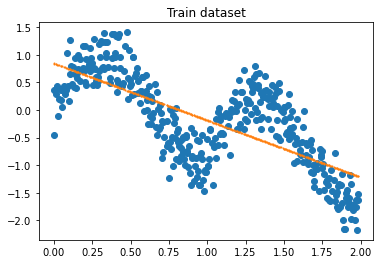

In [36]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

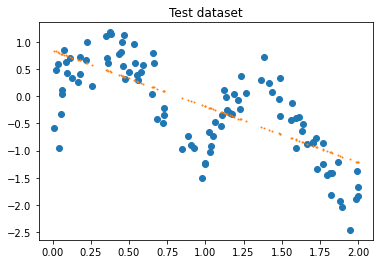

In [37]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

The data is approximately between (-2.5, 1.5) in the y-axis. So relatively speaking the MSE errors on train and test sets seem not to be acceptable
From the figures, the distribution of the dataset cannot be explained with a linear relationship. It just can say that, the data seem to decrease when moving towards x-axis which clearly does not state the reality of the figure.
The problem here is that even the best linear relationship does not meet the true data distribution, because the data seem to come from a different distribution, possibly from higher order polynomials(non-linear relationship)

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

Yes. Because Locally weighted linear regression (LWLR) is non-parametric and a higher preference is given to the points in the training set lying in the vicinity of x than the points lying far away from x.

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [38]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        # print(the_query_point)
        W[i, i] = np.exp(-(xi - the_query_point).T @ (xi - the_query_point)/(2 * hyperparameter **2))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [39]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.hstack((train_X, np.ones((l, 1))))
    qx = np.hstack((query_x, 1))
    W = get_weight_matrix(qx, X, hyperparameter)
    Y = train_Y
    # print(X.shape, W.shape, Y.shape)
    theta = np.linalg.pinv(X.T @ W @ X) @ (X.T @ W @ Y)

    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [47]:
hyperparameter = 0.01
predicted_test = [predict(x_train, y_train, query, hyperparameter) for query in x_test]
# np.array(predicted_test)[:, 0]
error = mean_squared_error(y_test, np.array(predicted_test)[:, 0])
print(f"MSE test error: {error}")

MSE test error: 0.10553261259665513


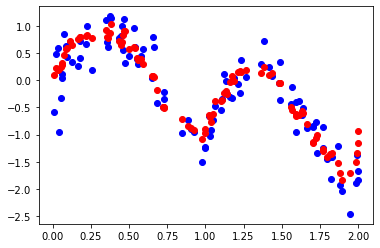

In [48]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="red")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

Yes, because in LWLR the cost function focuses more on the points closer to the query point and learns a "local" function.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

It will probably perform the same as LWLR for almost the same reasons. Because KNN too works locally to predict a new point and is very good to approximate non-linear relationships

### Part10:
Implementing the `KNN model`.

In [49]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = np.linalg.norm(x1 - x2, ord=2) # implement the distance function
        return distance

    def return_nn_ids(self, x):
        indices = [i[0] for i in sorted(enumerate([self.distance(x, t) for t in self.X]), key=lambda x:x[1])][:self.k]
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = np.mean(self.Y[neareest_indices])
        return predicted_y

In [50]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = mean_squared_error(y_test, np.array(predicted_y))
    return error, predicted_y

In [51]:
k = 4
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.09841065261190392


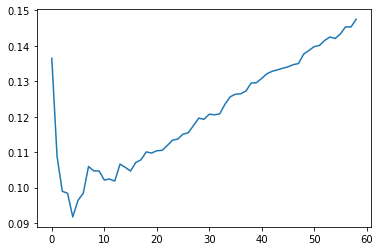

In [52]:
err = []
for k in range(1, 60):
    error_knn, _ = evaluation(k, x_train, y_train, x_test, y_test)
    err.append(error_knn)
plt.plot(err)
plt.show()

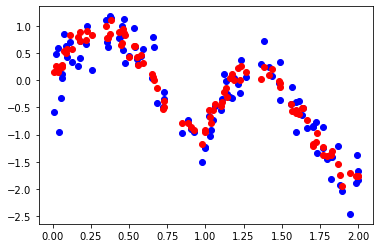

In [53]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="red")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

Yes but not that much different from LWLR